<a href="https://colab.research.google.com/github/Orikson/MAT-421/blob/main/MAT421_Module_G_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Integration Problem Statement

Numerical integration is the reverse problem to numerical differentiation. Instead of approximating the derivative of a function, how might we solve for its integral? The problem is posed as such:

Given an interval $I: [a,b]$, can we approximate the integral of some arbitrary function $f(x)$?

In this notebook, we investigate the numerical integration of two functions, namely,
1. $f(x) = x \sin(x)$
2. $f(x) = x^2 - 2x$

Analytical indefinite integral of function 1:


-x⋅cos(x) + sin(x)


Analytical indefinite integral of function 2:


 3     
x     2
── - x 
3      

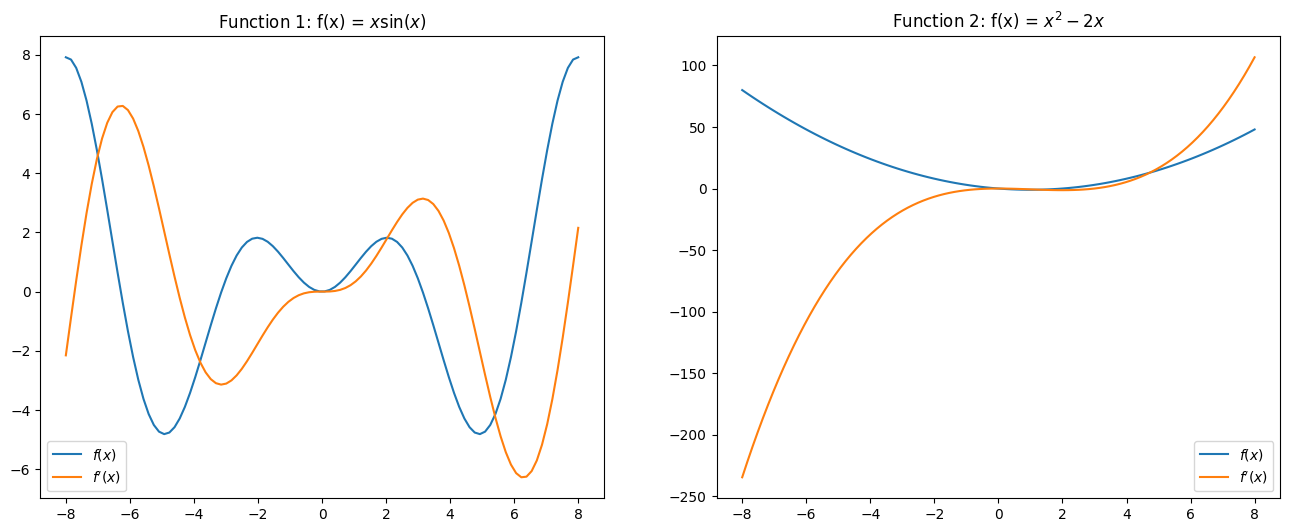

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
sympy.init_printing()

# Analytical results using sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')

print('Analytical indefinite integral of function 1:')
display(sympy.integrate(x*sympy.sin(x), x))

print('\nAnalytical indefinite integral of function 2:')
display(sympy.integrate(x**2 - 2*x, x))


x = np.linspace(-8, 8, 100)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(x, x*np.sin(x), label='$f(x)$')
ax1.plot(x, -x*np.cos(x) + np.sin(x), label='$f^\prime(x)$')
ax1.legend()
ax1.set_title('Function 1: f(x) = $x \sin(x)$')
ax2.plot(x, x*x-2*x, label='$f(x)$')
ax2.plot(x, x*x*x/3 - x*x, label='$f^\prime(x)$')
ax2.legend()
ax2.set_title('Function 2: f(x) = $x^2 - 2x$')
plt.show()

# Riemann's Integral

A simple method to choose, assuming we have discretized our function on a uniform grid, is to just take the sum of the area of rectangles defined along each sub-interval. The base of the rectangle would be the grid resolution size, while the height of the rectangle could be to the left endpoint or to the right endpoint ($x_i$ or $x_{i+1}$).

As shown in the lecture notes, the Riemann integral approximation over a single interval is $O(h^2)$. Over the entire interval, with $n = \frac{b - a}{h}$ steps, we find this is $n O(h^2) = \frac{b - a}{h} O(h^2) = O(h)$.

If we are given a function $f$ (i.e. not given a collection of just datapoints $x_i$), we can use the midpoint rule to obtain a higher order accuracy. We instead use the height as the function value in the middle of $x_i$ and $x_{i+1}$. Using $f\left(\frac{x_i + x_{i+1}}{2}\right)$ for the height brings the Riemann integral method to $O(h^2)$ over the whole interval.

For each problem specified above, we plot the approximation of the function
$$\int_{0}^{x} f(t) dt$$ and detail how using the left endpoint versus the middle or the right endpoint varies the numerical results.

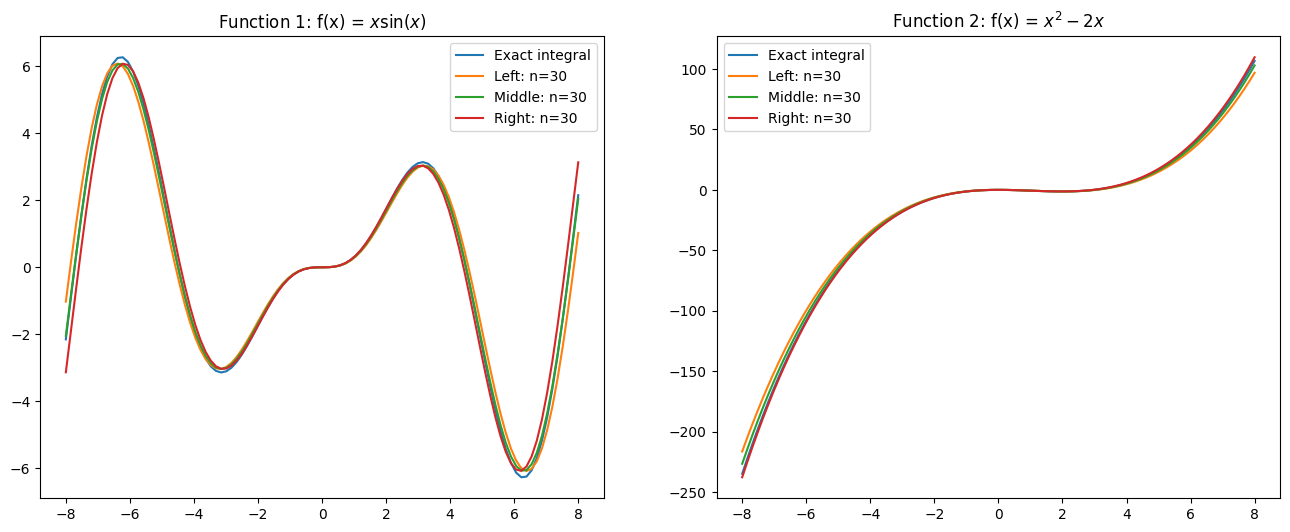

In [56]:
def left(f, a, b, n=50):
  h = (b - a) / n
  r = f(np.linspace(a, b, n)[:-1])
  return np.sum(r * h)

def right(f, a, b, n=50):
  h = (b - a) / n
  r = f(np.linspace(a, b, n)[1:])
  return np.sum(r * h)

def middle(f, a, b, n=50):
  h = (b - a) / n
  r = f(np.linspace(a, b, n)[:-1] + 0.5*h)
  return np.sum(r * h)

def f1(x):
  return x * np.sin(x)
def f2(x):
  return x*x - 2*x

x = np.linspace(-8, 8, 100)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(x, -x*np.cos(x) + np.sin(x), label='Exact integral')
for n in range(30, 50, 20):
  ax1.plot(x, [left(f1, 0, k, n=n) for k in x], label=f'Left: n={n}')
  ax1.plot(x, [middle(f1, 0, k, n=n) for k in x], label=f'Middle: n={n}')
  ax1.plot(x, [right(f1, 0, k, n=n) for k in x], label=f'Right: n={n}')
ax1.set_title('Function 1: f(x) = $x \sin(x)$')
ax1.legend()
ax2.plot(x, x*x*x/3 - x*x, label='Exact integral')
for n in range(30, 50, 20):
  ax2.plot(x, [left(f2, 0, k, n=n) for k in x], label=f'Left: n={n}')
  ax2.plot(x, [middle(f2, 0, k, n=n) for k in x], label=f'Middle: n={n}')
  ax2.plot(x, [right(f2, 0, k, n=n) for k in x], label=f'Right: n={n}')
ax2.set_title('Function 2: f(x) = $x^2 - 2x$')
ax2.legend()
plt.show()


# Trapezoid Rule

Ideally, for each interval, we would fit a shape that conforms exactly to the curve. This is infeasible when we the structure of the equation being integrated is unknown. Instead, to have a better approximation than just a rectangle, we might choose to use a trapezoid instead. Roughly, the trapezoid has a base on the x-axis, and has its remaining two endpoints at $f(x_i)$ and $f(x_{i+1})$.

This yields an area per step of
$$h \frac{f(x_i) + f(x_{i+1})}{2}$$

As shown in the notes, we can use a Taylor series expansion to show how this method has an $O(h^2)$ error over the entire interval. Notably, however, compared to the midpoint Riemann method described above, the trapezoidal rule still applies when the function is not provided.

Below, we compare the midpoint method to the trapezoid method, and find that their results are indeed very similar, and are close approximations for the true value of the integration.

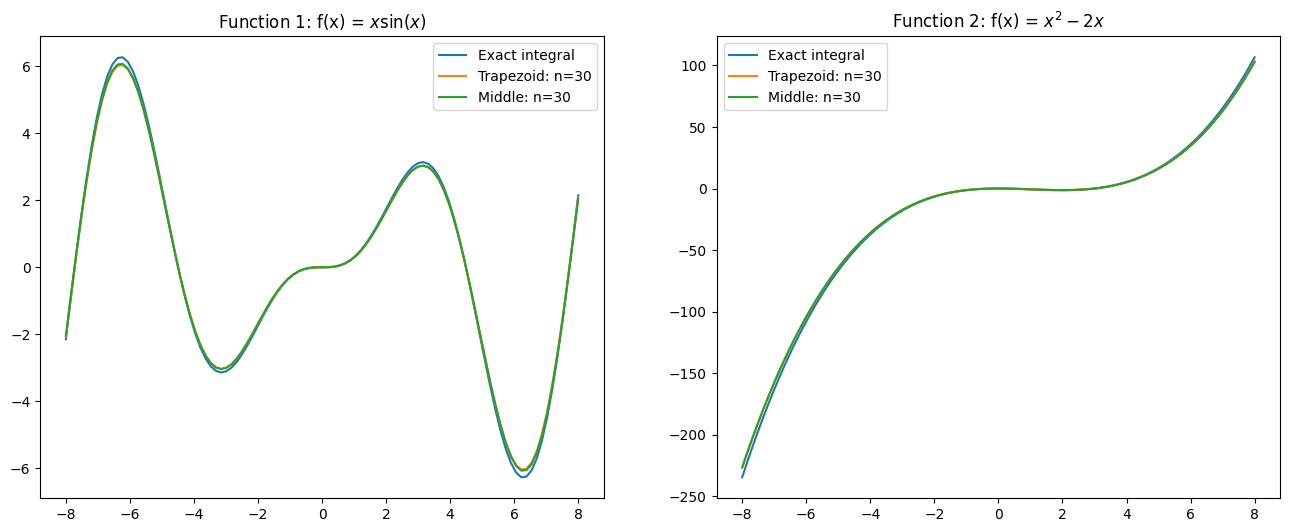

In [62]:
def trapezoid(f, a, b, n=50):
  h = (b - a) / n
  r = f(np.linspace(a, b, n))
  return (h/2) * (r[0] + r[-1] + 2*np.sum(r[1:-1]))

x = np.linspace(-8, 8, 100)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
ax1.plot(x, -x*np.cos(x) + np.sin(x), label='Exact integral')
for n in range(30, 50, 20):
  ax1.plot(x, [trapezoid(f1, 0, k, n=n) for k in x], label=f'Trapezoid: n={n}')
  ax1.plot(x, [middle(f1, 0, k, n=n) for k in x], label=f'Middle: n={n}')
ax1.set_title('Function 1: f(x) = $x \sin(x)$')
ax1.legend()
ax2.plot(x, x*x*x/3 - x*x, label='Exact integral')
for n in range(30, 50, 20):
  ax2.plot(x, [trapezoid(f2, 0, k, n=n) for k in x], label=f'Trapezoid: n={n}')
  ax2.plot(x, [middle(f2, 0, k, n=n) for k in x], label=f'Middle: n={n}')
ax2.set_title('Function 2: f(x) = $x^2 - 2x$')
ax2.legend()
plt.show()